# <b>Assignment Python 2 "NYC Property Sales"<b> 

#### Author: Bela Devianti Retnoningsih

## **Import Packages**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats
import seaborn as sns

## **Prepping Dataset**

#### Import dataset from folder

In [2]:
dataset = pd.read_csv('sales.csv')
dataset.head(2)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00


### Data Exploration

#### Find shape of the data

In [3]:
dataset.shape

(84548, 22)

##### **Highligt:** Concluded that the data has 22 columns and 84548 rows.

### Drop Data
##### **Highlight:** Menghilangkan data yang tidak diperlukan agar tidak mengganggu dataframe.

In [4]:
data_renamed = dataset.drop(columns=['EASE-MENT','APARTMENT NUMBER','ADDRESS','ZIP CODE','Unnamed: 0'], axis=1)

In [5]:
data_renamed

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


### Replace dataset
##### Replace dataset from value '-' to 0 and an empty dataset becomes null values

In [6]:
data_renamed.replace({"-":0},inplace=True)
data_renamed.replace(' ',np.nan, inplace=True)

### Changing The Dataset Category

##### Change the Dataset into string or numeric as its category.

###### **String Data**

In [7]:
cat = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 
       'TAX CLASS AT PRESENT', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 
       'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT']

for col in cat:
    data_renamed[col] = data_renamed[col].astype('category')

###### **Numeric Data**

In [8]:
numb = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numb:
    data_renamed[col] = pd.to_numeric(data_renamed[col], errors='coerce')

###### **Date Data**

In [9]:
data_renamed['SALE DATE'] = pd.to_datetime(data_renamed['SALE DATE'], errors='coerce')

### Analytic of missing values

In [10]:
data_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   RESIDENTIAL UNITS               84548 non-null  int64         
 8   COMMERCIAL UNITS                84548 non-null  int64         
 9   TOTAL UNITS                     84548 non-null  int64         
 10  LAND SQUARE FEET                58296 non-null  float64       
 11  GR

In [11]:
data_renamed.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

<AxesSubplot:>

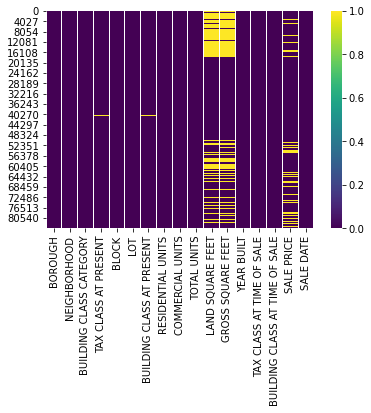

In [12]:
sns.heatmap(data_renamed.isnull(),cmap='viridis')

##### **Highlight:** Null values dominated in data 'Land Square Feet', 'Gross Square Feet', and 'Sale Price'

#### How's the percentage of null values?

In [13]:
data_renamed.isna().sum() /len(data_renamed) *100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.872877
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.872877
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.049818
GROSS SQUARE FEET                 32.658372
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        17.222170
SALE DATE                          0.000000
dtype: float64

##### **Highlight:** Around 30% of 'Land Square Feet' and 'Gross Square Feet' also around 17% on 'Sale Price' are null value.

In [14]:
data_renamed.describe()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,6.998700e+04
mean,2.998758,4237.218976,376.224015,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1.276456e+06
std,1.289790,3568.263407,658.136814,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,1.140526e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000,1322.750000,22.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,2.250000e+05
50%,3.000000,3311.000000,50.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,5.300000e+05
75%,4.000000,6281.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,9.500000e+05
max,5.000000,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


### Approximate the Null Value

In [15]:
data_renamed['LAND SQUARE FEET'] = data_renamed['LAND SQUARE FEET'].mask((data_renamed['LAND SQUARE FEET'].isnull()) & (data_renamed['GROSS SQUARE FEET'].notnull()), data_renamed['GROSS SQUARE FEET'])
data_renamed['GROSS SQUARE FEET'] = data_renamed['GROSS SQUARE FEET'].mask((data_renamed['LAND SQUARE FEET'].notnull()) & (data_renamed['GROSS SQUARE FEET'].isnull()), data_renamed['LAND SQUARE FEET'])

In [16]:
data_renamed.describe()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.830200e+04,5.830200e+04,6.998700e+04
mean,2.998758,4237.218976,376.224015,2.025264,0.193559,2.249184,3.944997e+03,4.365285e+03,1.276456e+06
std,1.289790,3568.263407,658.136814,16.721037,8.713183,18.972584,4.198315e+04,4.220756e+04,1.140526e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000,1322.750000,22.000000,0.000000,0.000000,1.000000,1.650000e+03,1.060000e+03,2.250000e+05
50%,3.000000,3311.000000,50.000000,1.000000,0.000000,1.000000,2.325000e+03,1.710000e+03,5.300000e+05
75%,4.000000,6281.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.600000e+03,9.500000e+05
max,5.000000,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2.210000e+09


In [46]:
sum(data_renamed.duplicated())

959

In [48]:
data_renamed.drop_duplicates()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


##### **Highlight:** Drop the duplicated data.

## **Exploratory Data Analysis**

In [49]:
data_renamed.describe()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.830200e+04,5.830200e+04,6.998700e+04
mean,2.998758,4237.218976,376.224015,2.025264,0.193559,2.249184,3.944997e+03,4.365285e+03,1.276456e+06
std,1.289790,3568.263407,658.136814,16.721037,8.713183,18.972584,4.198315e+04,4.220756e+04,1.140526e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000,1322.750000,22.000000,0.000000,0.000000,1.000000,1.650000e+03,1.060000e+03,2.250000e+05
50%,3.000000,3311.000000,50.000000,1.000000,0.000000,1.000000,2.325000e+03,1.710000e+03,5.300000e+05
75%,4.000000,6281.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.600000e+03,9.500000e+05
max,5.000000,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2.210000e+09


### Data Distribution

Text(0.5, 1.0, 'Boxplot of Sale Price')

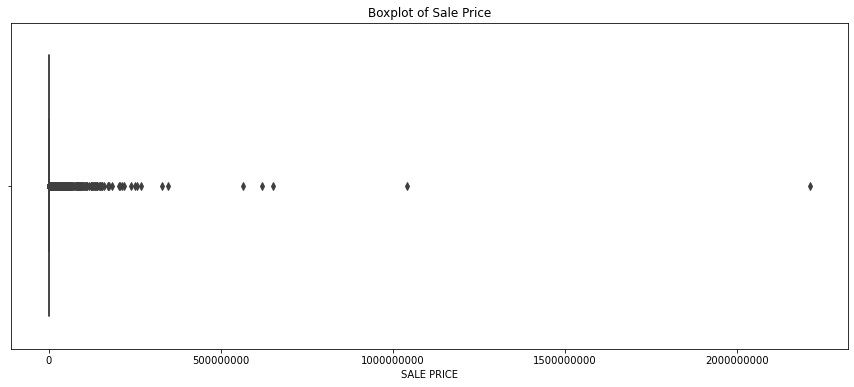

In [22]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=data_renamed)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Sale Price')

##### **Highlight:** Outliers seem to dominate the data, there are the outliers have to be carried out because it interferes with the statistical analysis.

In [51]:
data_new = data_renamed[(data_renamed['SALE PRICE']>=6.998700e+04)&(data_renamed['SALE PRICE']<=9.500000e+05)]

# The upper boundary adopted from data mean and the upper boundary adopted from quartile 75%

##### Nilai statistik (mean, media, quartiles, minumu, maximum, outliers) dapat diketahui dengan mudah melalui bos plot berikut.

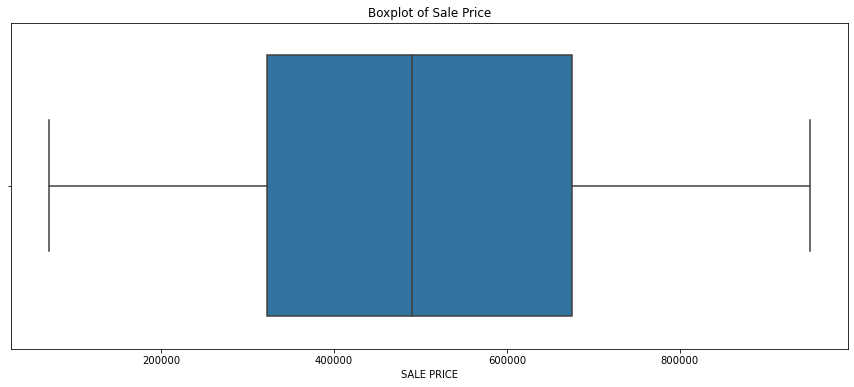

In [52]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=data_new)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Sale Price')
plt.show()

In [53]:
data_new['BOROUGH']=data_new['BOROUGH'].replace({1:'Manhattan',2:'Bronx',3:'Brooklyn',4:'Queens',5:'Staten Island'})

data_new
# Mengganti nama Borough agar mudah di simpulkan.

<ipython-input-53-6fc04818979a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['BOROUGH']=data_new['BOROUGH'].replace({1:'Manhattan',2:'Bronx',3:'Brooklyn',4:'Queens',5:'Staten Island'})


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,0,0,0,NaN,NaN,1920,2,C6,499000.0,2017-03-10
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,0,0,0,NaN,NaN,1920,2,C6,529500.0,2017-06-09
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,0,0,0,NaN,NaN,1920,2,C6,423000.0,2017-07-14
17,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,46,C6,0,0,0,NaN,NaN,1925,2,C6,501000.0,2017-03-16
18,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,49,C6,0,0,0,NaN,NaN,1920,2,C6,450000.0,2016-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,2,0,2,3325.0,1300.0,1995,1,B2,509000.0,2016-10-31
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,2,0,2,11088.0,2160.0,1994,1,B2,648000.0,2016-12-07
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21


C:\Users\Bela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Sale Price in NYC')

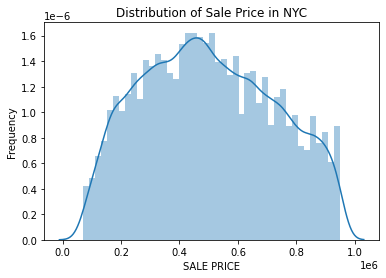

In [54]:
sns.distplot(data_new['SALE PRICE'])
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price in NYC')

### Calculate Mean per Borough

In [55]:
data_new.groupby(data_new['BOROUGH']).mean()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Bronx,4322.724513,313.259175,1.553240,0.040100,1.593113,2033.003172,1662.689850,396010.963299
Brooklyn,4915.068058,361.081757,1.220918,0.046314,1.277125,1647.059035,1224.279517,548269.177212
Manhattan,1230.300885,513.070286,0.416270,0.016678,0.446222,4892.116667,49144.283333,609471.775698
Queens,7129.056717,228.951761,1.214905,0.171333,1.388801,3705.756552,2374.655632,473994.574001
Staten Island,3306.079236,202.817576,1.267603,0.048983,1.315865,4313.468202,2051.968202,470650.399604


### Calculate Median per Borough

In [56]:
data_new.groupby(data_new['BOROUGH']).median()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Bronx,4338.5,48.0,1.0,0.0,1.0,2085.5,1600.0,390285.0
Brooklyn,5192.0,52.0,1.0,0.0,1.0,974.0,0.0,550000.0
Manhattan,1320.0,46.0,0.0,0.0,0.0,2576.0,9686.5,625000.0
Queens,6810.0,39.0,1.0,0.0,1.0,2650.0,1496.0,450000.0
Staten Island,3121.0,57.0,1.0,0.0,1.0,3300.0,1546.0,465000.0


### Calculate Mode by Borough

In [57]:
data_new.mode()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Queens,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,D4,1,0,1,0.0,0.0,1920,1,D4,450000.0,2016-12-22


##### **Highlight:** The showed mode is 'Borough' Queens which has the highest data.

### Calculate Range by Sale Price

In [58]:
data_new['SALE PRICE'].max()-data_new['SALE PRICE'].min()

880000.0

### Calculate Variance per Borough

In [59]:
data_new.groupby(data_new['BOROUGH']).var()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Bronx,1.085582e+06,610498.541922,51.833897,0.071584,51.864770,1.379521e+07,4.029534e+07,3.739861e+10
Brooklyn,6.967292e+06,288796.180115,22.754713,0.107021,22.875569,4.399815e+08,6.572771e+07,5.336276e+10
Manhattan,2.839382e+05,689120.113357,33.164222,0.239381,34.667916,2.541332e+07,5.302990e+09,4.096255e+10
Queens,1.840695e+07,247281.037831,257.819340,336.029204,599.154114,2.072613e+09,1.667856e+09,5.217199e+10
Staten Island,5.337237e+06,188592.918625,7.511949,2.895295,10.319520,7.616191e+08,1.227227e+08,3.348797e+10


### Calculate Standard Deviation per Borough

In [60]:
data_new.groupby(data_new['BOROUGH']).std()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Bronx,1041.912883,781.344061,7.199576,0.267553,7.201720,3714.190011,6347.861168,193387.193030
Brooklyn,2639.562926,537.397600,4.770190,0.327140,4.782841,20975.737105,8107.263055,231003.805708
Manhattan,532.858495,830.132588,5.758839,0.489266,5.887947,5041.162218,72821.631299,202392.073693
Queens,4290.332544,497.273605,16.056754,18.331099,24.477625,45525.959744,40839.387522,228411.889831
Staten Island,2310.246019,434.272862,2.740794,1.701557,3.212401,27597.448158,11078.028166,182997.181079


## **Confidence Interval**

#### Q : Confidence Interval of The Gross Land Feet?

In [33]:
mean_ci = data_new['GROSS SQUARE FEET'].mean()

mean_ci

1941.693688118812

In [34]:
std_ci = data_new['GROSS SQUARE FEET'].std()

std_ci

23120.001381317885

In [35]:
count_ci = data_new['GROSS SQUARE FEET'].count()

count_ci

30704

In [36]:
se_mean = std_ci/np.sqrt(count_ci)

se_mean

131.9442220965483

In [37]:
z = 2.17

# Confidence 97%

In [38]:
lcb = mean_ci - z * se_mean # lower limit of CI
ucb = mean_ci + z * se_mean # upper limit of CI

In [39]:
lcb

1655.374726169302

In [40]:
ucb

2228.012650068322

#### **Conclusion:** The Gross Square Feet of real estate in NYC are between 30349.2264 and 30916.7736.

## **Hypothesis Testing**

### Q : Has Queens the highest Gross Square Feet?

##### Null Hypothesis:
##### p >= 0.25

In [61]:
total = data_new['GROSS SQUARE FEET'].sum()

In [62]:
gsf = data_new.groupby(data_new['BOROUGH']).sum()

In [63]:
gsf['GROSS SQUARE FEET']

BOROUGH
Bronx             7339113.0
Brooklyn         11260923.0
Manhattan         2948657.0
Queens           20659504.0
Staten Island    10066956.0
Name: GROSS SQUARE FEET, dtype: float64

In [64]:
rasio =[]
for col in data_new.columns:
    p = gsf['GROSS SQUARE FEET']/total

rasio=p

In [65]:
for p in rasio:
    if p > 0.25:
        print('Null Hypothesis Accepted')
    else:
        print('Alternative Hypothesis Accepted')

Alternative Hypothesis Accepted
Alternative Hypothesis Accepted
Alternative Hypothesis Accepted
Null Hypothesis Accepted
Alternative Hypothesis Accepted


### **Conclusion:** Queens has the highest Gross Square Feet which is the hypothesis is suitable as Queens has the highest land area.